# Initialization
---
- Initialize는 초기화라는 뜻임. 신경망은 처음에 Weight를 랜덤하게 초기화하고 Loss가 최소화되는 부분을 찾아감. 
- 이전에는 초기 분포로 Uniform Distribution이나 Normal Distribution을 사용했음. 
- Weight를 랜덤하게 초기화하면 신경망의 초기 Loss가 달라짐. 신경망을 어떻게 초기화하느냐에 따라 학습 속도가 달라질 수 있음. 
- 가중치 초기화만 적절히 해줘도 기울기 소실 문제를 완화시킬 수 있음. 
- 때문에 신경망의 초기화 기법에 대해 다양한 연구가 이루어지고 있음.

- 대표적인 초기화 기법
    - Xavier Initialization
    - LeCun Initialization
    - He Initialization

## LeCun Initialization
---
- LeCun은 LeNet의 창시자이며, CNN을 세상에 도입한 사람임. 
- LeCun은 효과적인 역전파를 위한 논문에서 초기화 방법에 대해서 소개했는데, 정규분포를 따르는 방법과 균등분포를 따르는 두 가지 방법에 대해 소개함. 

## Xavier Initialization
---
- 이전 노드와 다음 노드의 개수에 의존하는 방법임. 
- Uniform 분포를 따르는 방법과 Normal 분포를 따르는 두 가지 방법이 사용됨. 
- 구조는 LeCun의 초기화 방법과 유사하지만 다음 층의 노드 수도 사용하고, 많은 연구를 통해 가장 최적화된 상수값 또한 찾아냈음. 
- Xavier 초기화는 비선형 함수(sigmoid, tanh)에서 효과적인 결과를 보여줌. 
    - 하지만 ReLU 함수에서 사용 시 출력 값이 0으로 수렴하게 되는 현상을 확인할 수 있음. 
    - 따라서 ReLU 함수에는 다른 초기화 방법을 사용해야 함. 

## He Initialization
---
- ReLU를 활성화 함수로 사용 시 Xavier 초기값 설정이 비효율적인 결과를 보이는 것을 확인했는데, 이런 경우 사용하는 초기화 방법을 He Initialization이라고 함. 
- 이 방법 또한 정규분포와 균등분포 두 가지 방법이 사용됨. 

## MNIST를 이용해 MLP 설계 시 Dropout + ReLU + Batch Normalization + He Uniform Initializattion 적용하기
---
- 일반적인 딥러닝 모델은 다음 순서대로 설계해 학습하고 성능을 평가함.  

1. 모델 구조를 설계하고 설계한 모델 구조의 파라미터 값을 랜덤하게 샘플링
2. Feature 값으로 이용되는 데이터를 설계한 모델의 Input으로 사용해 Output을 계산
3. 계산된 Output을 Input으로 이용한 Feature 갑소가 매칭되는 레이블 값을 기존에 정의한 objective function을 통해 Loss 값으로 계산
4. 계산된 Loss 값을 통해 Gradient를 계산해 모델 내 파라미터 값을 Back Propagation에 의해 업데이트
5. 이를 반복해 학습을 진행하며 학습이 완료된 이후 완성된 모델의 성능을 평가  


- 이 중 1번에서 섥계한 모델 구조의 파라미터 값을 랜덤으로 샘플링하는 과정에서 어떤 분포에서 샘플링을 진행하는지에 따라 모델의 학습이 좋은 방향으로 진행될 수도 있고, 나쁜 방향으로 진행될 수도 있음 -> 즉, 학습의 시작점을 좋게 설정하면 학습을 수월하게 진행할 수 있음. 
- 파이토치 내의 nn.linear는 Output으로 계산되는 벡터의 차원 수의 역수 값에 대한 +/- 범위 내 Uniform Distribution을 설정해 샘플링한다고 함. 
- 여기서 정의한 분포가 아닌, He Initialization을 이용해 파라미터를 초기화해보자. 

In [1]:
'''1. Module Import'''

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
'''2. 딥러닝 모델을 설계할 때 활용하는 장비 확인'''

if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
    
print('Using Pytorch version: ', torch.__version__, 'Device: ', DEVICE)

Using Pytorch version:  1.11.0 Device:  cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
'''3. MNIST 데이터 다운로드 (split train / test)'''

train_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = True,
                              download = True,
                              transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                             train = False,
                             transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                         batch_size = BATCH_SIZE,
                                         shuffle = True)

In [5]:
'''4. 데이터 확인하기'''

for (X_train, y_train) in train_loader:
    
    print('X_train: ', X_train.size(), 'type: ', X_train.type())
    print('y_train: ', y_train.size(), 'type: ', y_train.type())
    
    break

X_train:  torch.Size([32, 1, 28, 28]) type:  torch.FloatTensor
y_train:  torch.Size([32]) type:  torch.LongTensor


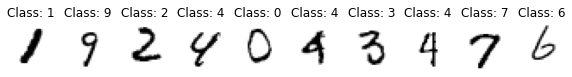

In [6]:
'''5. 데이터 확인하기'''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
    plt.title('Class: ' + str(y_train[i].item()))

In [7]:
'''6. MLP(Multi Layer Perceptron) 모델 설계하기'''

class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)
        
    def forward(self, x):
        
        x = x.view(-1, 28*28)
        
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_prob)
        
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x, training=self.training, p=self.dropout_prob)
        
        x = self.fc3(x)
        x = F.log_softmax(x, dim=1)
        
        return x

In [8]:
'''7. Optimizer, Objective Function 설정하기'''

# Weight, Bias 등 딥러닝 모델에서 초깃값으로 설정되는 요소에 대한 모듈인 init을 임포트
import torch.nn.init as init

# MLP 모델 내의 Weight를 초기화할 부분을 설정하기 위해 weight_init 함수 정의
def weight_init(m):
    
    # MLP 모델을 구성하고 있는 파라미터 중 nn.Linear에 해당하는 파라미터 값에 대해서만 지정
    if isinstance(m, nn.Linear):
        
        # nn.Linear에 해당하는 파라미터 값에 대해 he_initialization을 이용해 파라미터 값을 초기화
        init.kaiming_uniform_(m.weight.data)

model = Net().to(DEVICE)

# 앞서 정의한 weight_init 함수를 Net() 클래스의 인스턴스인 model에 적용
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
  (batch_norm1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batch_norm2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


- 지금까지 다룬 예제가 Class 내 모델을 설계하는 영역에서 설정했다면 이번에는 모델을 정의하는 부분에서 설정을 바꿈. 
- 파라미터 값 중 nn.Linear 인스턴스에 대해서는 kaiming_uniform_을 이용해 초기화하는 것으로 설정되어 있음. 
- 이외의 파라미터 값은 기본값으로 설정된 분포에서 샘플링해 랜덤으로 설정됨. 

In [9]:
'''8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def train(model, train_loader, optimizer, log_interval):
    
    model.train()
    
    for batch_idx, (image, label) in enumerate(train_loader):
        
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        
        # 과거에 이용한 Mini-Batch 내에 있는 이미지와 레이블을 바탕으로 계산된 Loss의 Gradient 값이
        # optimizer에 할당되어 있으므로 optimizer의 Gradient를 초기화
        optimizer.zero_grad()
        
        # 장비에 할당한 이미지 데이터를 MLP 모델의 Input으로 이용해 Output 계산
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        
        # 각 파라미터에 할당된 Gradient 값을 이용해 파라미터 값을 업데이트
        optimizer.step()
        
        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
            Epoch, batch_idx * len(image),
            len(train_loader.dataset), 100. * batch_idx / len(train_loader),
            loss.item()))

In [10]:
'''9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의'''

def evaluate(model, test_loader):
    
    # 학습 과정 또는 학습이 완료된 MLP 모델을 학습 상태가 아닌, 평가 상태로 지정
    model.eval()
    
    # 기존에 정의한 test_loader 내의 데이터를 이용해 Loss 값을 계산하기 위해 test_loss를 0으로 임시 설정
    test_loss = 0
    
    # 학습 과정 또는 학습이 완료된 MLP 모델이 올바른 Class로 분류한 경우를 세기 위해 correct = 0으로 임시 설정
    correct = 0
    
    with torch.no_grad():
        for image, label in test_loader:
            
            image = image.to(DEVICE)
            label = label.to(DEVICE)
    
            output = model(image)
            test_loss += criterion(output, label).item()
            
            prediction = output.max(1, keepdim=True)[1]
            
            # MLP 모델이 최종으로 예측한 클래스 값과 실제 레이블이 의미하는 클래스가 맞으면 correct에 더해 올바르게 예측한 횟수를 저장
            correct += prediction.eq(label.view_as(prediction)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    
    return test_loss, test_accuracy

In [11]:
'''10. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy를 확인하기'''

for Epoch in range(1, EPOCHS + 1):
    
    train(model, train_loader, optimizer, log_interval=200)
    
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
         format(Epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 3.100132
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.517624
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.367041
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.507790
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.312150
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.557056
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.381651
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.397203
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.243633
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.167273

[EPOCH: 1], 	Test Loss: 0.0069, 	Test Accuracy: 93.43 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.312635
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.510456
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.446387
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.239688
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.383590
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.536176
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.295238
Train Epoch: 2 [448

## Reference
---
- 파이썬 딥러닝 파이토치 - 이경택, 방성수, 안상준  
- https://wikidocs.net/61271
- https://reniew.github.io/13/